In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
companies = pd.read_csv("companies.txt", sep="\t", encoding = "ISO-8859-1")
rounds2 = pd.read_csv("rounds2.csv", encoding = "ISO-8859-1")
mapping = pd.read_csv("mapping.csv", encoding = "ISO-8859-1")

In [82]:
companies.head(5)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [83]:
print(companies.shape)
print(companies.info())
print("--------------")
companies.isnull().all(axis=1).sum()  #zero rows with all NULL values

(66368, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB
None
--------------


0

In [84]:
rounds2.head(5)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [85]:
print(rounds2.shape)
print(rounds2.info())
print("--------------")
rounds2.isnull().all(axis=1).sum()

(114949, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB
None
--------------


0

In [86]:
#finding unique records
a = len(companies.permalink.unique())
b = len(rounds2["company_permalink"].unique())
print(a)
print("------------")
print(b)

66368
------------
90247


In [87]:
#Merging two dataFrames
companies["permalink"] = companies["permalink"].str.lower()
rounds2["company_permalink"] = rounds2["company_permalink"].str.lower()

In [88]:
masterFrame = pd.merge(rounds2,companies,how="left",left_on = "company_permalink",right_on = "permalink")

In [89]:
masterFrame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [90]:
masterFrame.shape

(114949, 16)

In [91]:
#Data Cleaning ---
round(100*(masterFrame.isnull().sum()/len(masterFrame.index)),2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.01
name                        0.01
homepage_url                5.34
category_list               2.97
status                      0.01
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.86
dtype: float64

In [92]:
masterFrame = masterFrame.drop('funding_round_code', axis=1)
masterFrame = masterFrame.drop('founded_at', axis=1)
masterFrame = masterFrame.drop('homepage_url', axis=1)
round(100*(masterFrame.isnull().sum()/len(masterFrame.index)),2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.01
name                        0.01
category_list               2.97
status                      0.01
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
dtype: float64

In [93]:
masterFrame = masterFrame[~masterFrame.raised_amount_usd.isnull()]

In [94]:
round(100*(masterFrame.isnull().sum()/len(masterFrame.index)),2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
category_list              1.10
status                     0.00
country_code               6.16
state_code                 8.01
region                     7.42
city                       7.42
dtype: float64

In [95]:
#Here country_code and category_list are important parameters for the output, so cannot add a bias so as to get accurate
# results hence deleting the null rows
masterFrame = masterFrame[~masterFrame.category_list.isnull()]
masterFrame = masterFrame[~masterFrame.country_code.isnull()]
round(100*(masterFrame.isnull().sum()/len(masterFrame.index)),2)


company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
category_list              0.00
status                     0.00
country_code               0.00
state_code                 1.96
region                     1.34
city                       1.33
dtype: float64

In [96]:
masterFrame.head(10)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0,/organization/01games-technology,01Games Technology,Games,operating,HKG,NaN,Hong Kong,Hong Kong
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,22-05-2013,3000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View


In [97]:
#Funding type analysis ---
masterFrame['funding_round_type'].unique() 

array(['venture', 'seed', 'undisclosed', 'convertible_note',
       'private_equity', 'debt_financing', 'angel', 'grant',
       'equity_crowdfunding', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'secondary_market',
       'non_equity_assistance'], dtype=object)

In [98]:
funding = masterFrame.groupby('funding_round_type')
funding['raised_amount_usd'].mean().sort_values(ascending = True)

funding_round_type
non_equity_assistance    4.807534e+05
equity_crowdfunding      5.098980e+05
seed                     7.477937e+05
angel                    9.715739e+05
convertible_note         1.337187e+06
product_crowdfunding     1.353227e+06
grant                    4.512698e+06
venture                  1.172422e+07
undisclosed              1.589166e+07
debt_financing           1.716765e+07
post_ipo_equity          6.607706e+07
private_equity           7.393849e+07
secondary_market         8.443853e+07
post_ipo_debt            1.694518e+08
Name: raised_amount_usd, dtype: float64

In [99]:
# Here venture comes between range 5 to 15 Million and is the type in which Spark Funds is
# interested in, Hence funding type = Venture

In [100]:
#Country Analysis ---
#Finding teh top 9 countries with hightest venture investment - 
venture_data = masterFrame[masterFrame['funding_round_type']=="venture"]
countries = venture_data.groupby('country_code')
countries['raised_amount_usd'].sum().sort_values(ascending=False)

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
SWE    3.145857e+09
NLD    2.903876e+09
CHE    2.801560e+09
SGP    2.793918e+09
ESP    1.827622e+09
BRA    1.785818e+09
IRL    1.669286e+09
RUS    1.570426e+09
AUS    1.319029e+09
DNK    1.228311e+09
FIN    1.043200e+09
BEL    1.030840e+09
NOR    9.536361e+08
KOR    8.919883e+08
MYS    8.830588e+08
HKG    7.812670e+08
TWN    6.239795e+08
AUT    5.833607e+08
TUR    5.590975e+08
ITA    4.882894e+08
NZL    4.483164e+08
           ...     
KWT    1.400000e+07
LIE    1.309172e+07
MNE    1.220000e+07
SVN    1.201751e+07
BGR    1.130000e+07
KAZ    1.100000e+07
GRC    1.074378e+07
BAH    8.900000e+06
TTO    8.500000e+06
SVK    8.241062e+06
BGD    7.002000e+06
LBN    6.455000e+06
GGY    3.960000e+06
TUN    3.920000e+06
SEN    2.860000e+06
HRV    2.633669e+06
UGA    2.500000e+06
PER    2.469270e+06
BWA    

In [101]:
top9_countries = countries['raised_amount_usd'].sum().sort_values(ascending=False).head(9)
top9_countries

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
Name: raised_amount_usd, dtype: float64

In [102]:
top9 = venture_data[venture_data['country_code'].isin(["USA","CHN","GBR","IND","CAN","FRA","ISR","DEU","JPN"])]

In [103]:
#Sector analysis ---
mapping.head(10)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1


In [104]:
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [105]:
x = mapping.iloc[1:]
x

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1
10,Advertising Exchanges,0,0,0,0,0,0,0,0,1


In [106]:
mapping = x  #removing first null row
mapping.head(3)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0


In [107]:
mapping.sum(axis=0)

category_list                              3D3D Printing3D TechnologyAccountingActive Lif...
Automotive & Sports                                                                       22
Blanks                                                                                     0
Cleantech / Semiconductors                                                                53
Entertainment                                                                             89
Health                                                                                    63
Manufacturing                                                                             40
News, Search and Messaging                                                                72
Others                                                                                   195
Social, Finance, Analytics, Advertising                                                  153
dtype: object

In [108]:
mapping = mapping.drop('Blanks', axis=1)

In [109]:
mapping.head(30)

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,1
10,Advertising Exchanges,0,0,0,0,0,0,0,1


In [111]:
# for i in range(1,len(mapping)+1):
#     check = mapping['category_list'][i]
#     for a in range(0,len(check)):
#         if(check[a]=='0'):
#             check = check[:a]+'na'+check[a+1:]
#     mapping['category_list'][i] = check
mapping.category_list = mapping.category_list.str.replace('0','na')   #replacing '0' with 'na' 
mapping.category_list.head(30)

1                                     3D
2                            3D Printing
3                          3D Technology
4                             Accounting
5                       Active Lifestyle
6                           Ad Targeting
7                     Advanced Materials
8                       Adventure Travel
9                            Advertising
10                 Advertising Exchanges
11                  Advertising Networks
12                 Advertising Platforms
13                                Advice
14                             Aerospace
15                           Agriculture
16                 Air Pollution Control
17                            Algorithms
18                           All Markets
19                          All Students
20                  Alternative Medicine
21                                Alumni
22                             Analytics
23                               Android
24                                Angels
25              

In [112]:
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View


In [113]:
top9['category_list'] = top9['category_list'].astype(str).apply(lambda x: x.split('|')[0])
top9.head(20)

/home/girish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,Apps,acquired,USA,CA,SF Bay Area,Cupertino
28,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,4000000.0,/organization/10-minutes-with,10 Minutes With,Education,operating,GBR,H9,London,London
34,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,2520000.0,/organization/1000memories,1000memories,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco
38,/organization/1000museums-com,/funding-round/13be128d655076a025221d7fddc90d68,venture,14-10-2009,265940.0,/organization/1000museums-com,1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox


In [114]:
x=pd.melt(mapping, id_vars=['category_list'], var_name=['main_sector'])

In [115]:
x = x[x.value == 1]
x

,category_list,main_sector,value
7,Adventure Travel,Automotive & Sports,1
13,Aerospace,Automotive & Sports,1
44,Auto,Automotive & Sports,1
45,Automated Kiosk,Automotive & Sports,1
46,Automotive,Automotive & Sports,1
56,Bicycles,Automotive & Sports,1
68,Boating Industry,Automotive & Sports,1
86,CAD,Automotive & Sports,1
92,Cars,Automotive & Sports,1
187,Design,Automotive & Sports,1


In [116]:
x.shape

(687, 3)

In [117]:
top9 = pd.merge(top9,x, how = 'left', left_on="category_list",right_on="category_list")
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city,main_sector,value
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,Entertainment,1.0
1,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,"News, Search and Messaging",1.0
2,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,Cleantech / Semiconductors,1.0
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,"Social, Finance, Analytics, Advertising",1.0
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,"Social, Finance, Analytics, Advertising",1.0


In [118]:
#Removing null values from main_sector
len(top9[top9['main_sector'].isnull()])

175

In [119]:
top9=top9[~(top9['main_sector'].isnull())]
len(top9[top9['main_sector'].isnull()])

0

In [120]:
top9 = top9.drop('value',axis=1)
top9.tail()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city,main_sector
44113,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,11-07-2013,14219999.0,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,MO,MO - Other,Fremont,Cleantech / Semiconductors
44114,/organization/zyomyx-inc,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,29-01-2010,555016.0,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,MO,MO - Other,Fremont,Cleantech / Semiconductors
44115,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.0,/organization/zyrra,Zyrra,E-Commerce,operating,USA,MA,Boston,Cambridge,Others
44116,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,16-12-2004,8500000.0,/organization/zystor,Zystor,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,Cleantech / Semiconductors
44117,/organization/zznode-science-and-technology-co...,/funding-round/171693e1e07e0230defd8fddb6de4515,venture,01-04-2012,1587301.0,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,Enterprise Software,operating,CHN,22,Beijing,Beijing,Others


In [121]:
#English speaking countries- , 1) USA, 2)GBR, 3) IND


In [122]:
country_USA = top9[top9['country_code']=='USA']
country_USA.head()
country_GBR = top9[top9['country_code']=='GBR']
country_IND = top9[top9['country_code']=='IND']

In [123]:
country_USA = country_USA[(country_USA['raised_amount_usd']>5000000) & (country_USA['raised_amount_usd']<15000000)]
country_USA['raised_amount_usd'].count()

9942

In [124]:
country_USA['raised_amount_usd'].sum()

88638294664.0

In [125]:
top_sector_USA = country_USA.groupby('main_sector')
top_sector_USA['main_sector'].count().sort_values(ascending=False)

main_sector
Others                                     2423
Social, Finance, Analytics, Advertising    2216
Cleantech / Semiconductors                 1951
News, Search and Messaging                 1280
Health                                      760
Manufacturing                               691
Entertainment                               479
Automotive & Sports                         142
Name: main_sector, dtype: int64

In [126]:
highest_investment_company1 = country_USA[country_USA['main_sector']=='Others'].groupby(['main_sector','name']).raised_amount_usd.sum().sort_values(ascending=False)
highest_investment_company1

main_sector  name                        
Others       AirTight Networks               54201907.0
             Bit9                            48433533.0
             Zilliant                        45600000.0
             Redfin                          44800000.0
             Five9                           44600000.0
             Elemental Technologies          44100000.0
             Blazent                         44075260.0
             StoredIQ                        41836657.0
             ExaGrid Systems                 41717024.0
             RF Code                         41540000.0
             MOGL                            41436966.0
             ForeScout Technologies, Inc.    41250000.0
             Tillster                        41198945.0
             Vyatta                          40800000.0
             Mantara                         40399999.0
             Spigit                          40200000.0
             PMW Technologies                39890477.0
      

In [127]:
highest_investment_company2 = country_USA[country_USA['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','name']).raised_amount_usd.sum().sort_values(ascending=False).head(3)
highest_investment_company2

main_sector                              name                           
Social, Finance, Analytics, Advertising  SST Inc. (Formerly ShotSpotter)    67933006.0
                                         FirstRain                          58344731.0
                                         ChoiceStream                       58300000.0
Name: raised_amount_usd, dtype: float64

In [128]:
top_sector_GBR = country_GBR.groupby('main_sector')
top_sector_GBR['main_sector'].count().sort_values(ascending=False)

main_sector
Others                                     516
Cleantech / Semiconductors                 437
Social, Finance, Analytics, Advertising    421
News, Search and Messaging                 241
Entertainment                              136
Manufacturing                              122
Health                                     118
Automotive & Sports                         44
Name: main_sector, dtype: int64

In [129]:
country_GBR['raised_amount_usd'].count()

2035

In [130]:
country_GBR = country_GBR[(country_GBR['raised_amount_usd']>5000000) & (country_GBR['raised_amount_usd']<15000000)]
country_GBR['raised_amount_usd'].sum()

4875228300.0

In [131]:
highest_investment_company2 = country_GBR[country_GBR['main_sector']=='Cleantech / Semiconductors'].groupby(['main_sector','name']).raised_amount_usd.sum().sort_values(ascending=False).head(3)
highest_investment_company2

main_sector                 name                        
Cleantech / Semiconductors  EUSA Pharma                     35600000.0
                            Horizon Discovery               31353719.0
                            F-star Biotechnology Limited    29132906.0
Name: raised_amount_usd, dtype: float64

In [132]:
country_IND = country_IND[(country_IND['raised_amount_usd']>5000000) & (country_IND['raised_amount_usd']<15000000)]
print("---------------")
country_IND['raised_amount_usd'].sum()

---------------


2174543602.0

In [133]:
country_IND['raised_amount_usd'].count()

243

In [134]:
top_sector_IND = country_IND.groupby('main_sector')
top_sector_IND['main_sector'].count().sort_values(ascending=False).head(5)

main_sector
Others                                     78
Social, Finance, Analytics, Advertising    45
News, Search and Messaging                 41
Entertainment                              23
Manufacturing                              18
Name: main_sector, dtype: int64

In [135]:
highest_investment_company2 = country_IND[country_IND['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','name']).raised_amount_usd.sum().sort_values(ascending=False).head(3)
highest_investment_company2

main_sector                              name                      
Social, Finance, Analytics, Advertising  inTarvo                       21900000.0
                                         Grameen Financial Services    21556050.0
                                         BankBazaar.com                19000000.0
Name: raised_amount_usd, dtype: float64

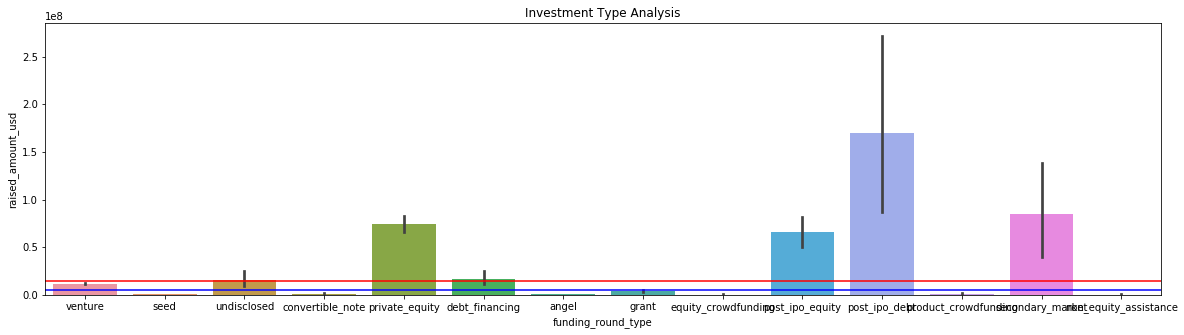

In [136]:
plt.figure(figsize=(20,5))
plot1 = sns.barplot(x='funding_round_type', y='raised_amount_usd', data=masterFrame)
plt.axhline(5000000, color='blue')
plt.axhline(15000000, color='red')
plot1.set_title('Investment Type Analysis')
plt.show()

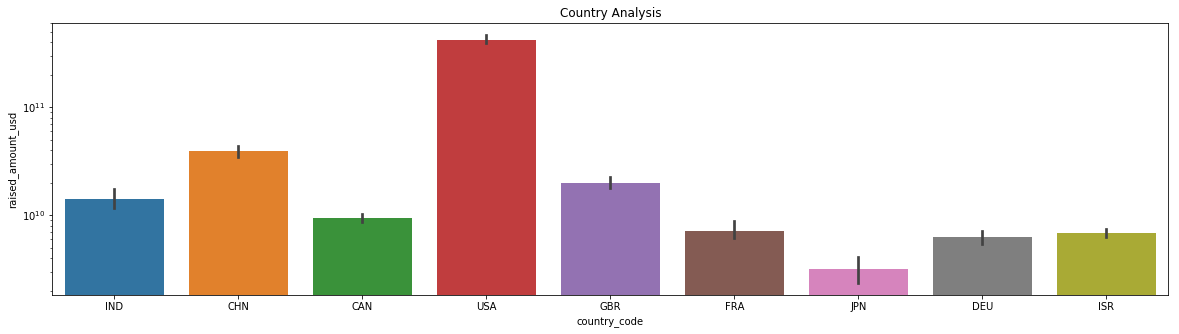

In [137]:
plt.figure(figsize=(20,5))
plot2 = sns.barplot(x='country_code', y='raised_amount_usd',estimator=np.sum, data=top9)
plot2.set_title('Country Analysis')
plot2.set_yscale('log')
plt.show()

In [138]:
final_frame = country_USA[country_USA['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising',
                                             'Cleantech / Semiconductors'])]
final_frame = final_frame.append([country_GBR[country_GBR['main_sector'].isin(['Others','Cleantech / Semiconductors ',
                                             'Social, Finance, Analytics, Advertising'])]])
final_frame = final_frame.append([country_IND[country_IND['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising',
                                                                 'News, Search and Messaging'])]])
final_frame.head(5)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city,main_sector
5,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,"Social, Finance, Analytics, Advertising"
28,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,16-12-2014,11999347.0,/organization/128-technology,128 Technology,Service Providers,operating,USA,MA,Boston,Burlington,Others
41,/organization/170-systems,/funding-round/b84bb882ca873f5fb96535671981196d,venture,16-04-2002,14000000.0,/organization/170-systems,170 Systems,Software,acquired,USA,MA,Boston,Bedford,Others
47,/organization/17zuoye,/funding-round/8d87f771e938e0f31641bd600abbafca,venture,01-09-2013,10000000.0,/organization/17zuoye,17zuoye,Education,operating,USA,VA,VA - Other,Shanghai,Others
76,/organization/21e6,/funding-round/bdf9f5bf67ee51155eae223acac57ec5,venture,17-11-2013,5050000.0,/organization/21e6,21 Inc,Big Data,operating,USA,CA,SF Bay Area,San Francisco,"Social, Finance, Analytics, Advertising"


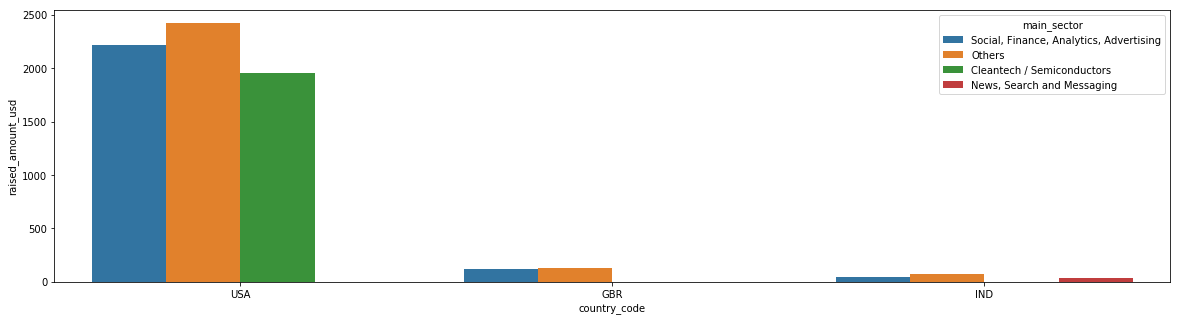

In [139]:
plt.figure(figsize=(20,5))
plot3 = sns.barplot(x='country_code',y="raised_amount_usd", hue="main_sector", estimator=lambda x: len(x),
                    data=final_frame)
plt.show()

END